In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np


In [13]:
import pandas as pd
df = pd.read_csv('Final_dataset1.csv')
df = df.drop(columns=['id'])
df

,bank,year,SB,JEB,NPL,ROA,CLR,AS,Total Assets ($M),AFCR,CPI,ED,IR,LMD,IRMT
0,Beijing,2012,0,0,0.0059,0.0113,0.2334,13.93,1119969,0.0250,0.026,0.0780,3.258,7.078,2.911518
1,Beijing,2013,0,0,0.0065,0.0110,0.2100,14.11,1336764,0.0250,0.026,0.0777,3.347,5.874,5.621088
2,Beijing,2014,0,0,0.0086,0.0109,0.2000,14.24,1524437,0.0278,0.020,0.0743,3.882,1.542,0.372331
3,Beijing,2015,0,0,0.0112,0.0100,0.1900,14.43,1844909,0.0311,0.014,0.0704,5.376,0.826,0.442608
4,Beijing,2016,0,0,0.0127,0.0090,0.1900,14.57,2116339,0.0325,0.020,0.0685,6.831,0.157,0.615456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Zijin,2018,0,1,0.0169,0.0069,0.1234,12.17,193165,0.0388,0.021,0.0675,4.528,1.018,0.223918
458,Zijin,2019,0,1,0.0168,0.0072,0.1040,12.21,201319,0.0399,0.029,0.0595,4.612,1.321,0.460878
459,Zijin,2020,0,1,0.0168,0.0069,0.1121,12.29,217664,0.0370,0.025,0.0224,4.357,1.433,0.402785
460,Zijin,2021,0,1,0.0145,0.0071,0.1800,12.24,206666,0.0336,0.009,0.0811,3.763,2.617,0.724859


In [4]:
# 将处理后的数据导出为CSV
df.to_csv('data.csv', index=False)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 先定义一个辅助函数来处理百分比转换
def convert_percentage(df, column_name):
    if df[column_name].dtype == object:
        # 只有在列是对象（通常是字符串）类型时才执行转换
        df[column_name] = df[column_name].str.rstrip('%').astype('float') / 100.0

# 应用这个函数来转换所有需要的列
percentage_columns = ['NPL', 'ROA', 'CLR', 'AFCR', 'CPI', 'ED', 'IR']
for col in percentage_columns:
    convert_percentage(df, col)


df = df.rename(columns={'JEB': 'JSB'})

# 特征工程：创建交互项
df['IRMT*SB'] = df['IRMT'] * df['SB']
df['IRMT*JSB'] = df['IRMT'] * df['JSB']

# 标准化处理
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['NPL', 'ROA', 'CLR', 'Total Assets ($M)', 'AFCR', 'CPI', 'ED', 'IR', 'LMD', 'IRMT', 'IRMT*SB', 'IRMT*JSB']])
scaled_df = pd.DataFrame(scaled_features, columns=['NPL_scaled', 'ROA_scaled', 'CLR_scaled', 'Total_Assets_scaled', 'AFCR_scaled', 'CPI_scaled', 'ED_scaled', 'IR_scaled', 'LMD_scaled','IRMT_scaled', 'IRMT_SB_scaled', 'IRMT_JSB_scaled'])

# 将标准化后的特征合并回原始DataFrame
df = pd.concat([df, scaled_df], axis=1)


df

,bank,year,SB,JSB,NPL,ROA,CLR,AS,Total Assets ($M),AFCR,...,CLR_scaled,Total_Assets_scaled,AFCR_scaled,CPI_scaled,ED_scaled,IR_scaled,LMD_scaled,IRMT_scaled,IRMT_SB_scaled,IRMT_JSB_scaled
0,Beijing,2012,0,0,0.0059,0.0113,0.2334,13.93,1119969,0.0250,...,0.518560,0.027021,0.145873,0.85,0.947189,0.000000,1.000000,0.318797,0.0,0.000000
1,Beijing,2013,0,0,0.0065,0.0110,0.2100,14.11,1336764,0.0250,...,0.466548,0.032501,0.145873,0.85,0.942078,0.024909,0.826037,0.615482,0.0,0.000000
2,Beijing,2014,0,0,0.0086,0.0109,0.2000,14.24,1524437,0.0278,...,0.444321,0.037245,0.199616,0.55,0.884157,0.174643,0.200116,0.040768,0.0,0.000000
3,Beijing,2015,0,0,0.0112,0.0100,0.1900,14.43,1844909,0.0311,...,0.422094,0.045346,0.262956,0.25,0.817717,0.592779,0.096662,0.048463,0.0,0.000000
4,Beijing,2016,0,0,0.0127,0.0090,0.1900,14.57,2116339,0.0325,...,0.422094,0.052208,0.289827,0.55,0.785349,1.000000,0.000000,0.067389,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Zijin,2018,0,1,0.0169,0.0069,0.1234,12.17,193165,0.0388,...,0.274061,0.003592,0.410749,0.60,0.768313,0.355444,0.124404,0.024518,0.0,0.027294
458,Zijin,2019,0,1,0.0168,0.0072,0.1040,12.21,201319,0.0399,...,0.230940,0.003798,0.431862,1.00,0.632027,0.378953,0.168184,0.050464,0.0,0.056179
459,Zijin,2020,0,1,0.0168,0.0069,0.1121,12.29,217664,0.0370,...,0.248944,0.004211,0.376200,0.80,0.000000,0.307585,0.184366,0.044103,0.0,0.049097
460,Zijin,2021,0,1,0.0145,0.0071,0.1800,12.24,206666,0.0336,...,0.399867,0.003933,0.310940,0.00,1.000000,0.141338,0.355440,0.079369,0.0,0.088357


In [15]:
# 分割数据集为训练集和测试集
X = df[['ROA_scaled', 'CLR_scaled', 'Total_Assets_scaled', 'AFCR_scaled', 'CPI_scaled', 'ED_scaled','IR_scaled', 'LMD_scaled', 'IRMT_scaled', 'IRMT_SB_scaled', 'IRMT_JSB_scaled']]
y = df['NPL_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X

,ROA_scaled,CLR_scaled,Total_Assets_scaled,AFCR_scaled,CPI_scaled,ED_scaled,IR_scaled,LMD_scaled,IRMT_scaled,IRMT_SB_scaled,IRMT_JSB_scaled
0,0.522059,0.518560,0.027021,0.145873,0.85,0.947189,0.000000,1.000000,0.318797,0.0,0.000000
1,0.500000,0.466548,0.032501,0.145873,0.85,0.942078,0.024909,0.826037,0.615482,0.0,0.000000
2,0.492647,0.444321,0.037245,0.199616,0.55,0.884157,0.174643,0.200116,0.040768,0.0,0.000000
3,0.426471,0.422094,0.045346,0.262956,0.25,0.817717,0.592779,0.096662,0.048463,0.0,0.000000
4,0.352941,0.422094,0.052208,0.289827,0.55,0.785349,1.000000,0.000000,0.067389,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
457,0.198529,0.274061,0.003592,0.410749,0.60,0.768313,0.355444,0.124404,0.024518,0.0,0.027294
458,0.220588,0.230940,0.003798,0.431862,1.00,0.632027,0.378953,0.168184,0.050464,0.0,0.056179
459,0.198529,0.248944,0.004211,0.376200,0.80,0.000000,0.307585,0.184366,0.044103,0.0,0.049097
460,0.213235,0.399867,0.003933,0.310940,0.00,1.000000,0.141338,0.355440,0.079369,0.0,0.088357


In [9]:
# 将处理后的数据导出为CSV
df.to_csv('processed_data.csv', index=False)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 获取系数
coefficients = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficient'])

# 打印IRMT的系数
print("IRMT Coefficient in Linear Regression:", coefficients.loc['IRMT_scaled', 'Coefficient'])

# 使用测试集进行预测
y_pred_linear = linear_reg.predict(X_test)

# 计算均方误差（MSE）和R2
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")



IRMT Coefficient in Linear Regression: -0.2891049504890994
Linear Regression MSE: 0.01917127537285115, R2: 0.3483895516228228


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 使用随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 预测测试集
y_pred_rf = rf_regressor.predict(X_test)

# 计算性能指标
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")


Random Forest MSE: 0.01281340407585961, R2: 0.5644865658268872


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# 使用梯度提升树回归模型
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# 预测测试集
y_pred_gb = gb_regressor.predict(X_test)

# 计算性能指标
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}, R2: {r2_gb}")


Gradient Boosting MSE: 0.011338246674251066, R2: 0.6146255345284828


In [20]:
# 随机森林特征重要性
feature_importances_rf = rf_regressor.feature_importances_

# 梯度提升树特征重要性
feature_importances_gb = gb_regressor.feature_importances_

# 将特征重要性以DataFrame的形式展示
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_RF': feature_importances_rf,
    'Importance_GB': feature_importances_gb
}).sort_values(by='Importance_RF', ascending=False)

print(features_df)


                Feature  Importance_RF  Importance_GB
3           AFCR_scaled       0.226641       0.222131
0            ROA_scaled       0.157222       0.149357
2   Total_Assets_scaled       0.149756       0.179321
6             IR_scaled       0.127040       0.108799
1            CLR_scaled       0.100744       0.066405
7            LMD_scaled       0.084748       0.144018
8           IRMT_scaled       0.060569       0.034564
10      IRMT_JSB_scaled       0.046433       0.055123
5             ED_scaled       0.020529       0.006393
4            CPI_scaled       0.016708       0.006618
9        IRMT_SB_scaled       0.009611       0.027272


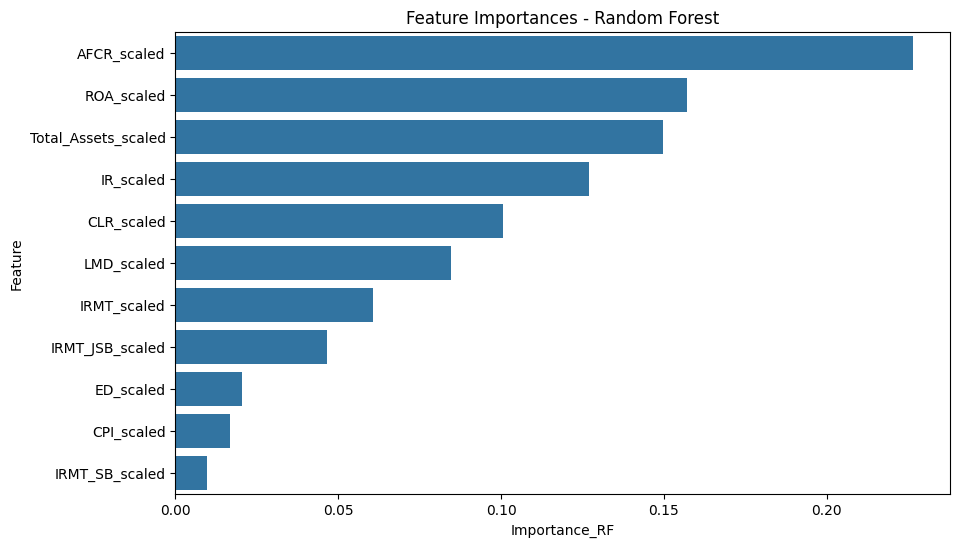

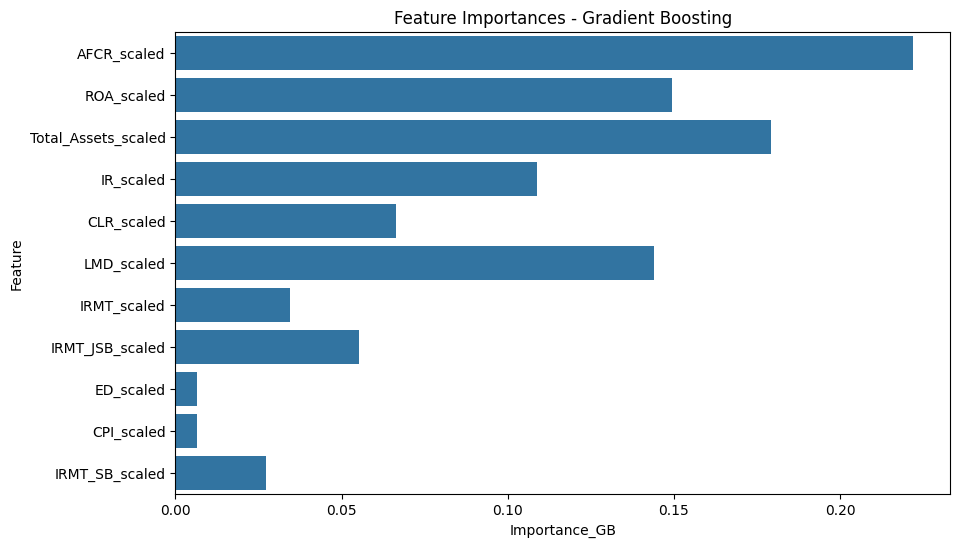

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance_RF', y='Feature')
plt.title('Feature Importances - Random Forest')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance_GB', y='Feature')
plt.title('Feature Importances - Gradient Boosting')
plt.show()


In [21]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [22]:
import shap

# 以随机森林为例计算SHAP值
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train)

# 可视化第一个样本的SHAP值
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


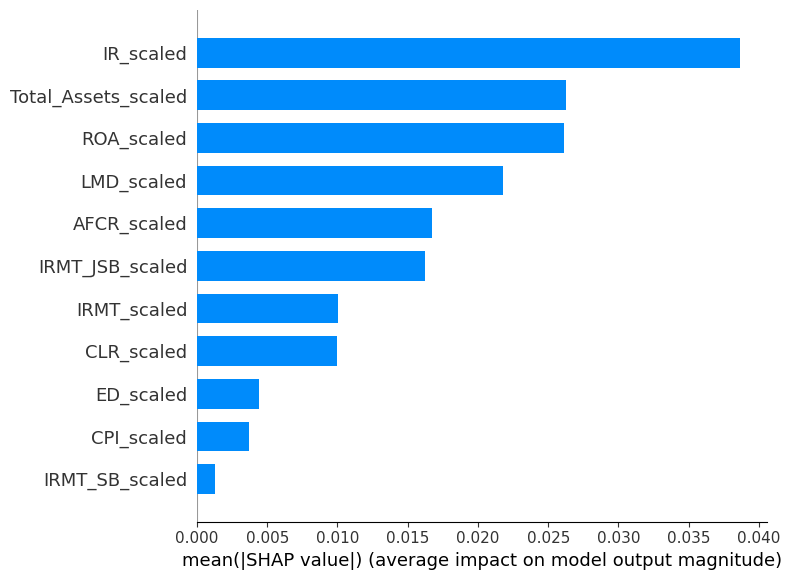

In [27]:
# SHAP值分析
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train)

# 可视化全体数据的SHAP值
shap.summary_plot(shap_values, X_train, plot_type="bar")